In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import metrics

from Utils import plot_features, wrong_predicts, plot_points
from PotentialClassesClassifier import PotentialFunctionClassifier

In [2]:
iris = datasets.load_iris()
# 150 flowers. Each flower has 4 features
X = iris.data
y = iris.target

feature_names = iris.feature_names
features_name_to_num = dict([(name, i) for i, name in enumerate(iris.feature_names)])

# Посмотреть на данные
# Поиск гиперпараметров

In [3]:
# plt.figure(figsize=(10, 8), dpi=100)
# plot_features(X=X, Y=y, f_names=iris.feature_names)

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=10)

In [5]:
model = PotentialFunctionClassifier(window_size=10)
model.fit(train_x, train_y)
pred = model.predict(test_x)

In [6]:
print("Accuracy on test: ", metrics.accuracy_score(test_y, pred))
print("Accuracy on train: ", metrics.accuracy_score(train_y, model.predict(train_x)))
print("Accuracy on whole data: ", metrics.accuracy_score(y, model.predict(X)))

Accuracy on test:  0.9466666666666667
Accuracy on train:  1.0
Accuracy on whole data:  0.9733333333333334


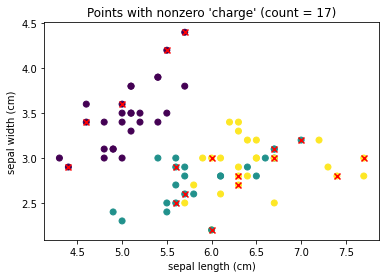

In [7]:
x_axis = feature_names[0]
y_axis = feature_names[1]
plt.title(f"Points with nonzero 'charge' (count = {model.charges_count})")
plot_points(x=train_x[:, features_name_to_num[x_axis]], 
            y=train_x[:, features_name_to_num[y_axis]], 
            сlasses=train_y, 
            marked_indexes=model.positive_charges_indixes, 
            axes_names=(x_axis, y_axis))

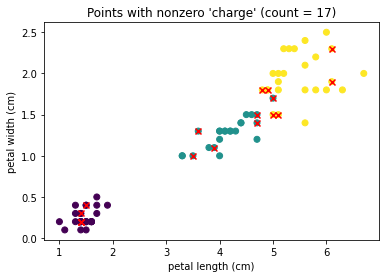

In [8]:
x_axis = feature_names[2]
y_axis = feature_names[3]
plt.title(f"Points with nonzero 'charge' (count = {model.charges_count})")
plot_points(x=train_x[:, features_name_to_num[x_axis]], 
            y=train_x[:, features_name_to_num[y_axis]], 
            сlasses=train_y, 
            marked_indexes=model.positive_charges_indixes, 
            axes_names=(x_axis, y_axis))

In [9]:
windows = np.arange(1, 100, dtype=np.int32)
accs = []
charges_counts = []

for window in windows:
    model = PotentialFunctionClassifier(window_size=window)
    model.fit(train_x, train_y, 5)
    pred = model.predict(test_x)
    accuracy = metrics.accuracy_score(test_y, pred)
    accs.append(accuracy)
    charges_counts.append(model.charges_count)

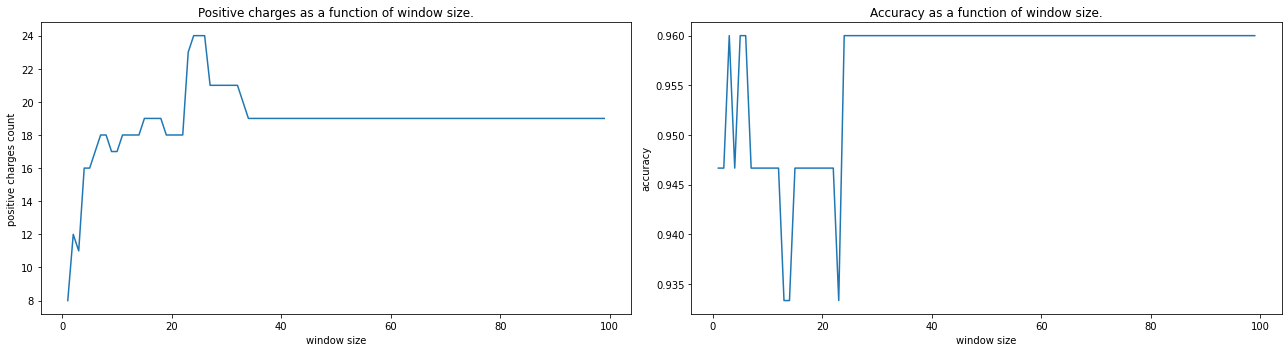

In [10]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.xlabel('window size')
plt.ylabel('positive charges count') 
plt.title('Positive charges as a function of window size.')
plt.plot(windows, charges_counts)
plt.subplot(1, 2, 2)
plt.xlabel('window size')
plt.ylabel('accuracy') 
plt.title('Accuracy as a function of window size.')
plt.plot(windows, accs)
plt.tight_layout()

In [11]:
windows = np.arange(1, 100, dtype=np.int32)
accs = []

for window in windows:
    model = KNeighborsClassifier(weights=lambda x: 1 / (x / window + 1))
    for i in range(5):
        model.fit(train_x, train_y)
    pred = model.predict(test_x)
    accuracy = metrics.accuracy_score(test_y, pred)
    accs.append(accuracy)

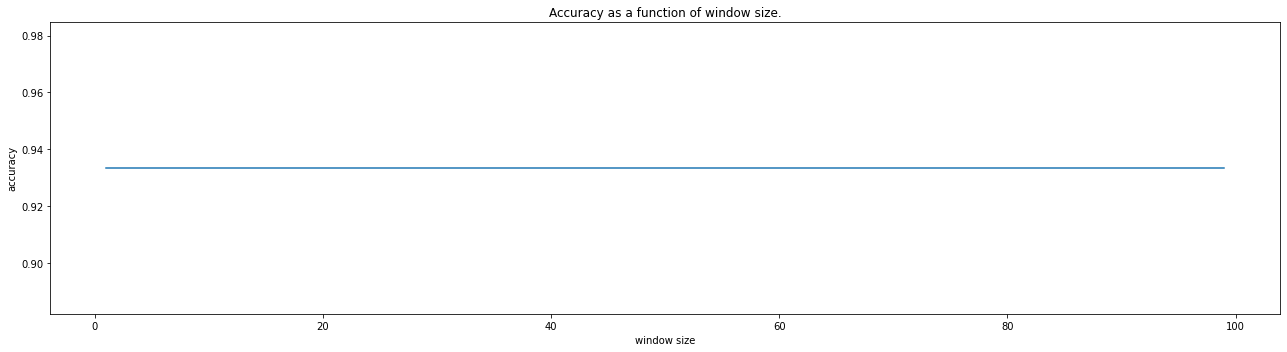

In [12]:
plt.figure(figsize=(18, 5))
plt.xlabel('window size')
plt.ylabel('accuracy') 
plt.title('Accuracy as a function of window size.')
plt.tight_layout()
plt.plot(windows, accs)

In [13]:
#plot_features(test_x, test_y, features_names, wrong_predicts(pred, test_y))

In [14]:
model = PotentialFunctionClassifier(window_size=10)
model.set_classifier_parameters(train_x=train_x, train_y=train_y)
pred = model.predict(test_x)

In [15]:
print("Accuracy on test: ", metrics.accuracy_score(test_y, pred))
print("Accuracy on train: ", metrics.accuracy_score(train_y, model.predict(train_x)))
print("Accuracy on whole data: ", metrics.accuracy_score(y, model.predict(X)))

Accuracy on test:  0.30666666666666664
Accuracy on train:  0.36
Accuracy on whole data:  0.3333333333333333


In [16]:
# plot_features(test_x, test_y, features_names, wrong_predicts(pred, test_y))

# Отрисовать объекты с нулевыми потенциалами (или не с нулевыми), а также как зависит от window_size